In [2]:
#Import of Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import dlib as dlib
import scipy.sparse.linalg

from sklearn.datasets import load_svmlight_file
import skimage as sk
import skimage.io as io
from PIL import Image, ImageDraw as Imk
from IPython.display import Image, display

import scipy 
import face_recognition
import cv2

from google_images_download import google_images_download 

In [4]:
#call dlib frontal face detection function
detector = dlib.get_frontal_face_detector()
win = dlib.image_window() #function used to display pictures on the screen

#format jpg-image 
print("Processing file: {}".format("8. 1200px-cambrai_-_tour_de_france%2c_%c3%a9tape_4%2c_7_juillet_2015%2c_arriv%c3%a9e_%28b36%29_%28cropped%29.jpg")) #read image using imread() function from skimage
img = io.imread("8. 1200px-cambrai_-_tour_de_france%2c_%c3%a9tape_4%2c_7_juillet_2015%2c_arriv%c3%a9e_%28b36%29_%28cropped%29.jpg")
# The 1 in the second argument indicates that we should upsample the image
# 1 time.  This will make everything bigger and allow us to detect more
# faces.
dets = detector(img, 1)

print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets): #loop over detections and display amount and position of detection
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        i, d.left(), d.top(), d.right(), d.bottom()))

win.clear_overlay()
win.set_image(img)
win.add_overlay(dets)
dlib.hit_enter_to_continue()

Processing file: 8. 1200px-cambrai_-_tour_de_france%2c_%c3%a9tape_4%2c_7_juillet_2015%2c_arriv%c3%a9e_%28b36%29_%28cropped%29.jpg
Number of faces detected: 1
Detection 0: Left: 418 Top: 376 Right: 803 Bottom: 761


The first step when dealing with images and face recognition is to detect wheather there is a face in the picture or not. The code above reads an image from a file location and then displays it. If there is a face in the picture, it will be marked by a a red square.Addionally, the program tells how many faces were detected and where they were located in the image. The dlib detecotr works very well with an accuracy of ... on the ... dataset. However, there are certain limitations. If the face is covered by sunglasses or hair the detector does not perform as well. Furthermore, the picture needds to have a certian size in order to be detected. We need enough pixcels.

Below the output of the code and an example of succesful face detection.

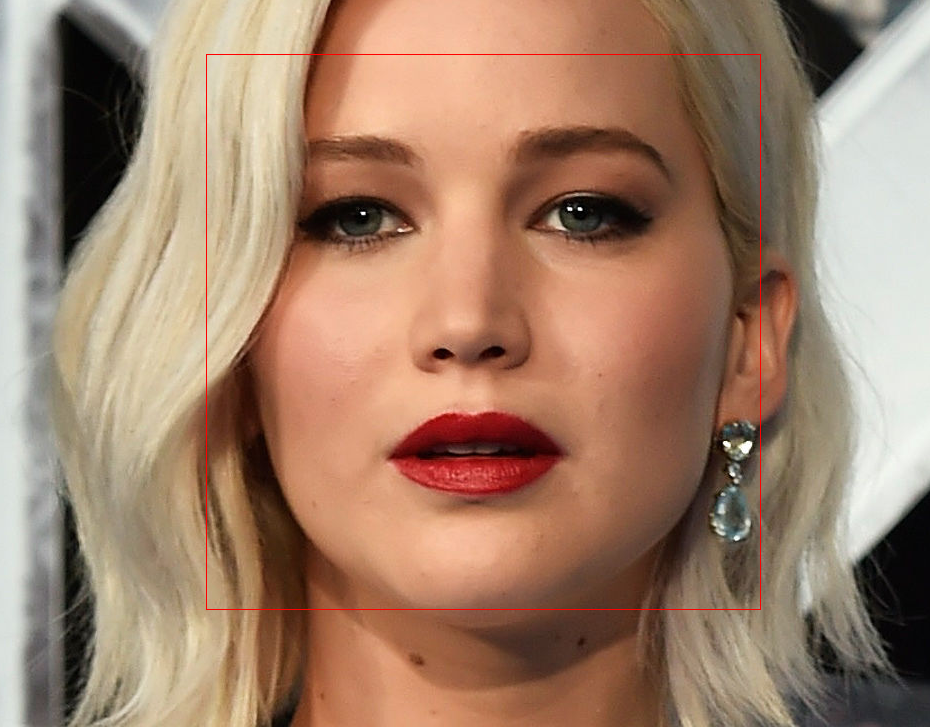

In [8]:
Image(filename='/Users/E5430/Desktop/Semester Project 2018/Detection_Example.PNG', width=300, height=300)


In [9]:
#Code to scrap images from Google-Images

response = google_images_download.googleimagesdownload() #Class Installation

arguments = {"keywords":"Amy Adams, Tom Cruise, Ronald Reagan","limit":10,"print_urls":True,"size":"large"}   
#creating list of arguments
response.download(arguments)   #passing the arguments to the function


Item no.: 1 --> Item name = Amy Adams
Evaluating...
Starting Download...
Image URL: https://www.telestar.fr/var/telestar/storage/images/3/0/7/2/3072090/amy-adams-quelle-maladie-chronique-actrice-souffre-elle.jpg
Completed Image ====> 1. amy-adams-quelle-maladie-chronique-actrice-souffre-elle.jpg
Image URL: http://pixel.nymag.com/imgs/daily/vulture/2016/08/18/magazine/19-amy-adams.w750.h560.2x.jpg
Completed Image ====> 2. 19-amy-adams.w750.h560.2x.jpg
Image URL: http://media.dishnation.com/content/uploads/2016/04/amy-adams-dish-nation.jpg
Completed Image ====> 3. amy-adams-dish-nation.jpg
Image URL: https://vignette.wikia.nocookie.net/wikidoublage/images/b/b1/Amy_Adams.jpg/revision/latest?cb=20160206145027&path-prefix=fr
IOError on an image...trying next one... Error: [Errno 22] Invalid argument: 'downloads/Amy Adams/4. latest?cb=20160206145027&path-prefix=fr.jpg'
Image URL: http://image.boomsbeat.com/data/images/full/169581/amy-adams.jpg


KeyboardInterrupt: 

The script presented above allows us to scrap images from Google Images. The amount of pictures we want to dowload can be specified in the code. The pictures go to a folder called Dowloads place in the directory of this notebook. For now 10 pictures of 3 celebreties (Jennifer Lawrence, Bradley Cooper and Peter Sagan)  were dowloaded. 

In [10]:
#Load Image with face_recognition
image = face_recognition.load_image_file("5. 000_13t74d.jpg")

face_locations = face_recognition.face_locations(image) #Locate faces with face_recognition library
face_landmarks_list = face_recognition.face_landmarks(image) #Get locations and outlines of each person's eyes, nose, mouth and chin

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list))) #Display how many faces have been found

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    facial_features = [
        'chin',
        'left_eyebrow',
        'right_eyebrow',
        'nose_bridge',
        'nose_tip',
        'left_eye',
        'right_eye',
        'top_lip',
        'bottom_lip'
    ]

    for facial_feature in facial_features:
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image)

    for facial_feature in facial_features:
        d.line(face_landmarks[facial_feature], width=5)

    pil_image.show()


I found 1 face(s) in this photograph.
The chin in this face has the following points: [(449, 99), (448, 116), (446, 133), (448, 151), (456, 165), (468, 176), (484, 182), (501, 185), (517, 185), (531, 183), (541, 178), (549, 171), (554, 162), (558, 152), (561, 141), (562, 131), (563, 121)]
The left_eyebrow in this face has the following points: [(482, 74), (493, 67), (507, 64), (520, 67), (530, 74)]
The right_eyebrow in this face has the following points: [(542, 80), (549, 79), (556, 82), (562, 86), (564, 92)]
The nose_bridge in this face has the following points: [(532, 87), (533, 91), (534, 96), (535, 101)]
The nose_tip in this face has the following points: [(517, 117), (523, 118), (528, 120), (534, 120), (538, 120)]
The left_eye in this face has the following points: [(493, 88), (500, 85), (507, 86), (512, 90), (507, 90), (500, 89)]
The right_eye in this face has the following points: [(539, 96), (546, 95), (552, 98), (555, 102), (550, 101), (545, 98)]
The top_lip in this face has t

AttributeError: type object 'Image' has no attribute 'fromarray'

'Jennifer Lawrence Face Landmarks'

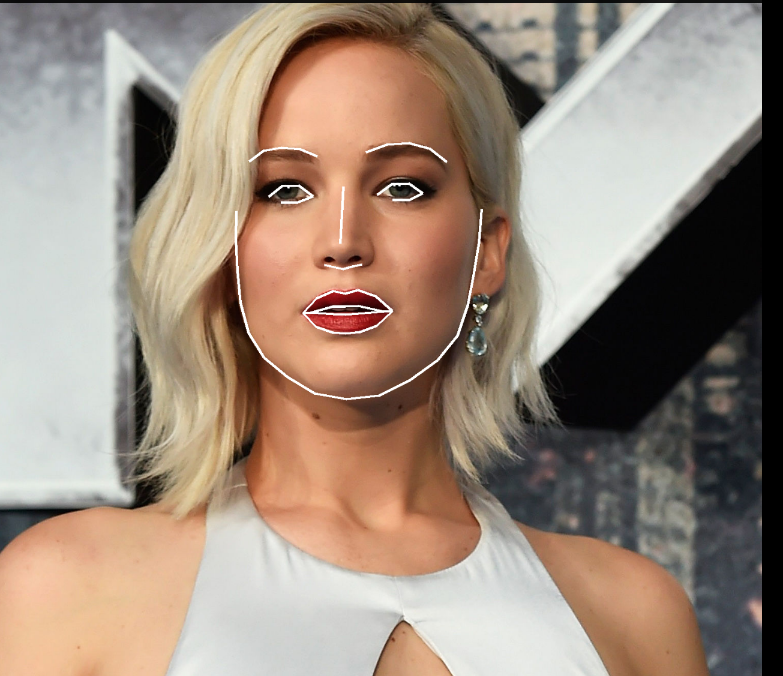

'Peter Sagan Face Landmarks'

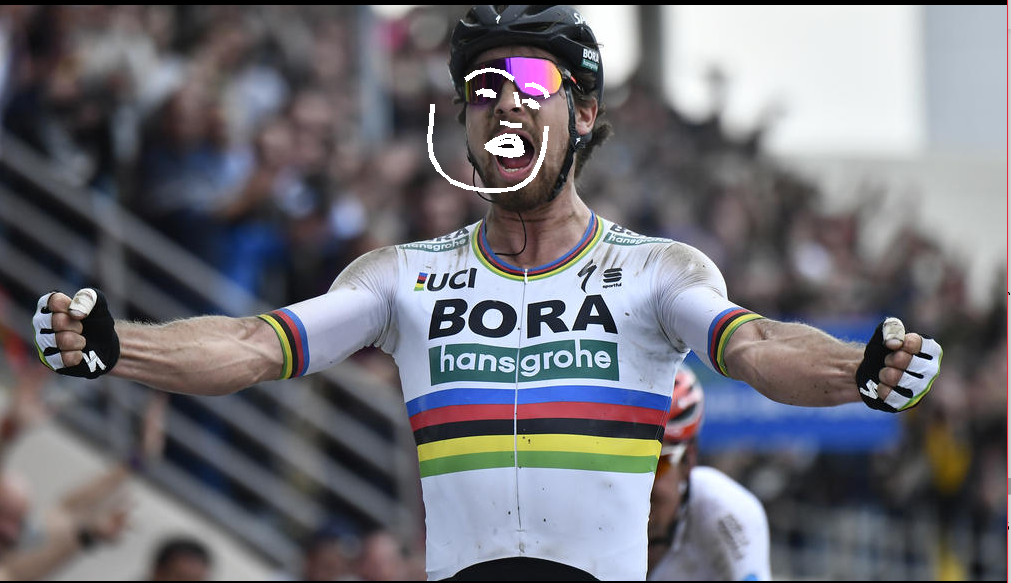

In [11]:
#Jennifer Lawrence Face Landmarks
ImageA = Image(filename='Regular_Landmark.PNG', width=300, height=300)
#Peter Sagan Face Landmarks
ImageB = Image(filename='Sunglasses_Landmark.PNG', width=300, height=300)
display('Jennifer Lawrence Face Landmarks', ImageA, 'Peter Sagan Face Landmarks' ,ImageB)

The Detection and Face Landmarking worked very well for the first picture. As can been seen, eyes, eye-browns, mouth and nose are outlined as well as the chin and lower half of the face. The upper face is not outlined. This may be due hair covering parts of the upper face. The second pictures landmarks are quite off. From prior experience with testing face detection on faces with sunglasses, we can assume tha the sunglasses are causing th distortion. 

In [12]:
#First Recognition Attempt - Success
picture_of_JL = face_recognition.load_image_file("6. jennifer-lawrence.jpg")
JL_encoding = face_recognition.face_encodings(picture_of_JL)[0]

# my_face_encoding now contains a universal 'encoding' of my facial features that can be compared to any other picture of a face!

unknown_picture = face_recognition.load_image_file("4. 150_44965.jpg")
unknown_face_encoding = face_recognition.face_encodings(unknown_picture)[0]

# Now we can see the two face encodings are of the same person with `compare_faces`!
results = face_recognition.compare_faces([JL_encoding], unknown_face_encoding)

if results[0] == True:
    print("It's Jennifer Lawrence.")
else:
    print("It's not Jennifer Lawrence.")

It's not Jennifer Lawrence.


For now, our face recognition did perform well, it did recognize that we were showing it a picture of someone else. A picture of  Bradley Cooper was shown instead.  Here both pictures:

'Picture encoded and Associated with Jennifer Lawrence'

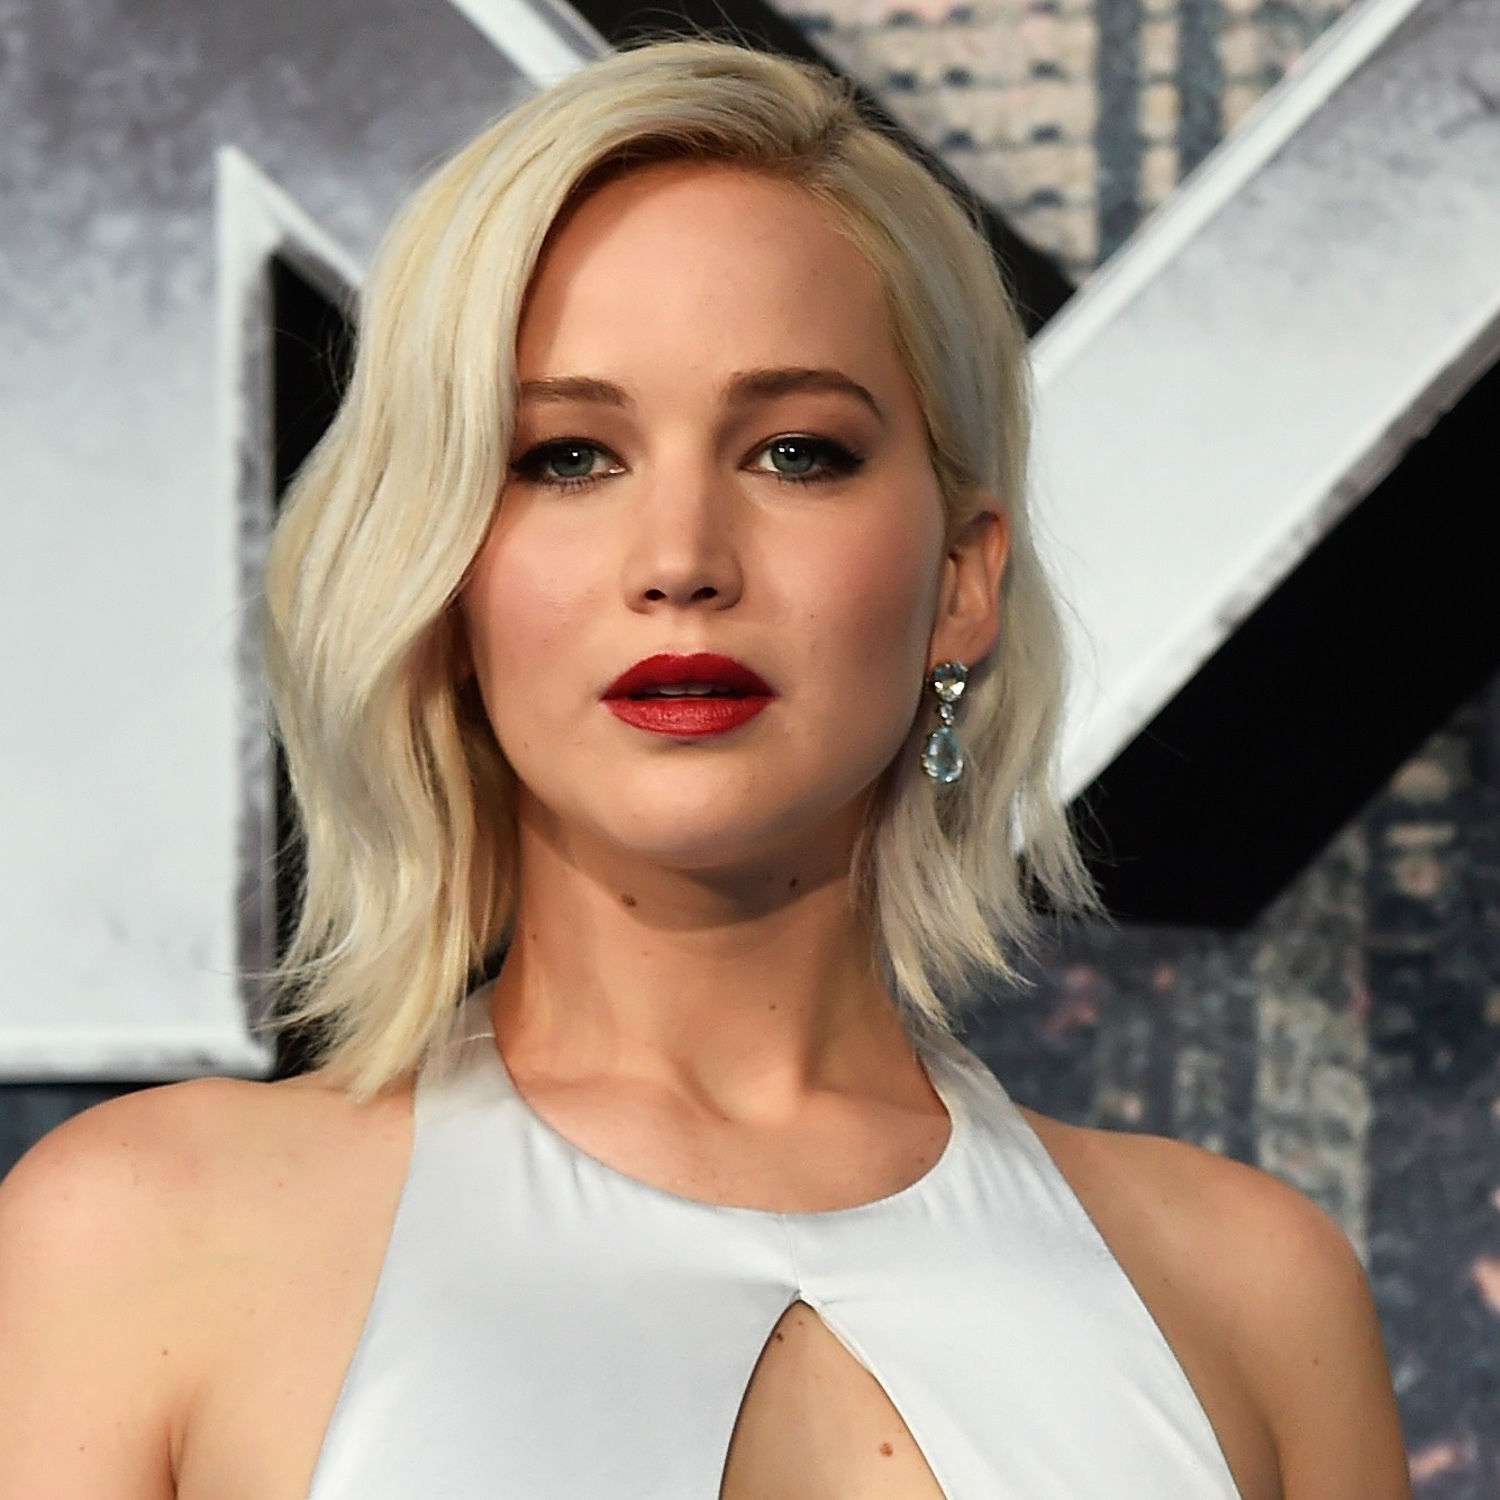

'Another picture of a person'

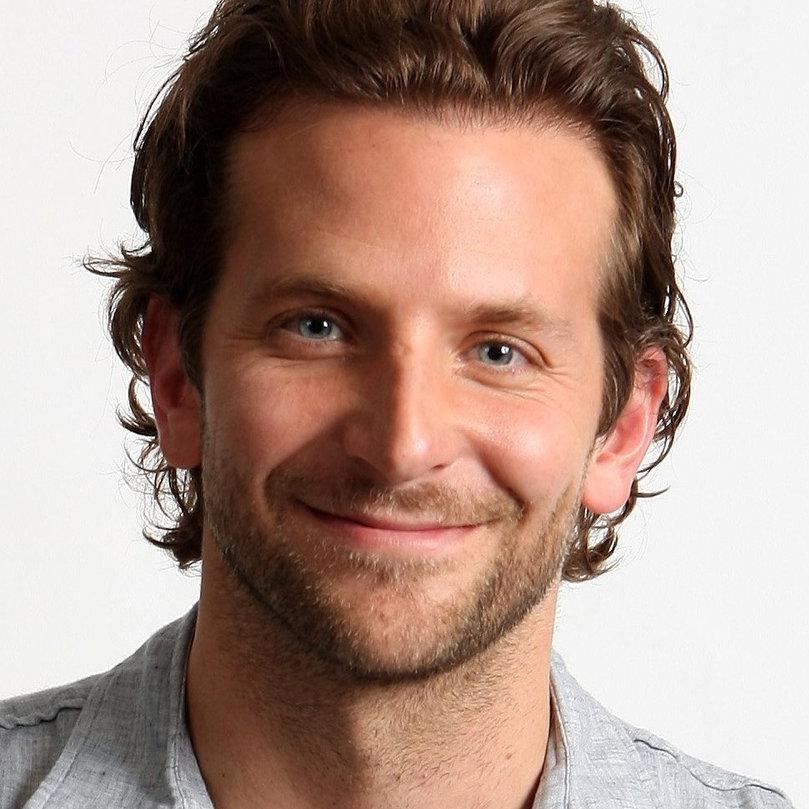

In [13]:
#Image jennifer-lawrence 6
Image1 = Image(filename='6. jennifer-lawrence.jpg', width=300, height=300) 
#Image Bradley Cooper 4
Image2 = Image(filename='4. 150_44965.jpg', width=300, height=300)
display('Picture encoded and Associated with Jennifer Lawrence', Image1, 'Another picture of a person',Image2 )

In [14]:
#Second Recognition Attempt - Success
picture_of_JL = face_recognition.load_image_file("6. jennifer-lawrence.jpg")
JL_encoding = face_recognition.face_encodings(picture_of_JL)[0]

# my_face_encoding now contains a universal 'encoding' of my facial features that can be compared to any other picture of a face!

unknown_picture = face_recognition.load_image_file("1. 1200px-jennifer_lawrence_in_2016.jpg")
unknown_face_encoding = face_recognition.face_encodings(unknown_picture)[0]

# Now we can see the two face encodings are of the same person with `compare_faces`!

results = face_recognition.compare_faces([JL_encoding], unknown_face_encoding)

if results[0] == True:
    print("It's Jennifer Lawrence.")
else:
    print("It's not Jennifer Lawrence.")

It's Jennifer Lawrence.


Not much documentation on how the encoding works exaclty. Source Code: https://github.com/davisking/dlib/blob/b85cb68e79471c819e29081c33d09e7371f41539/dlib/image_transforms/interpolation.h#L1927-L1966

Dlib does something called Landmark Alignment. In Landmark Alignment, the difference between key face landmarks and the same point's location in an average face model is calculated. 

'Picture encoded and Associated with Jennifer Lawrence'

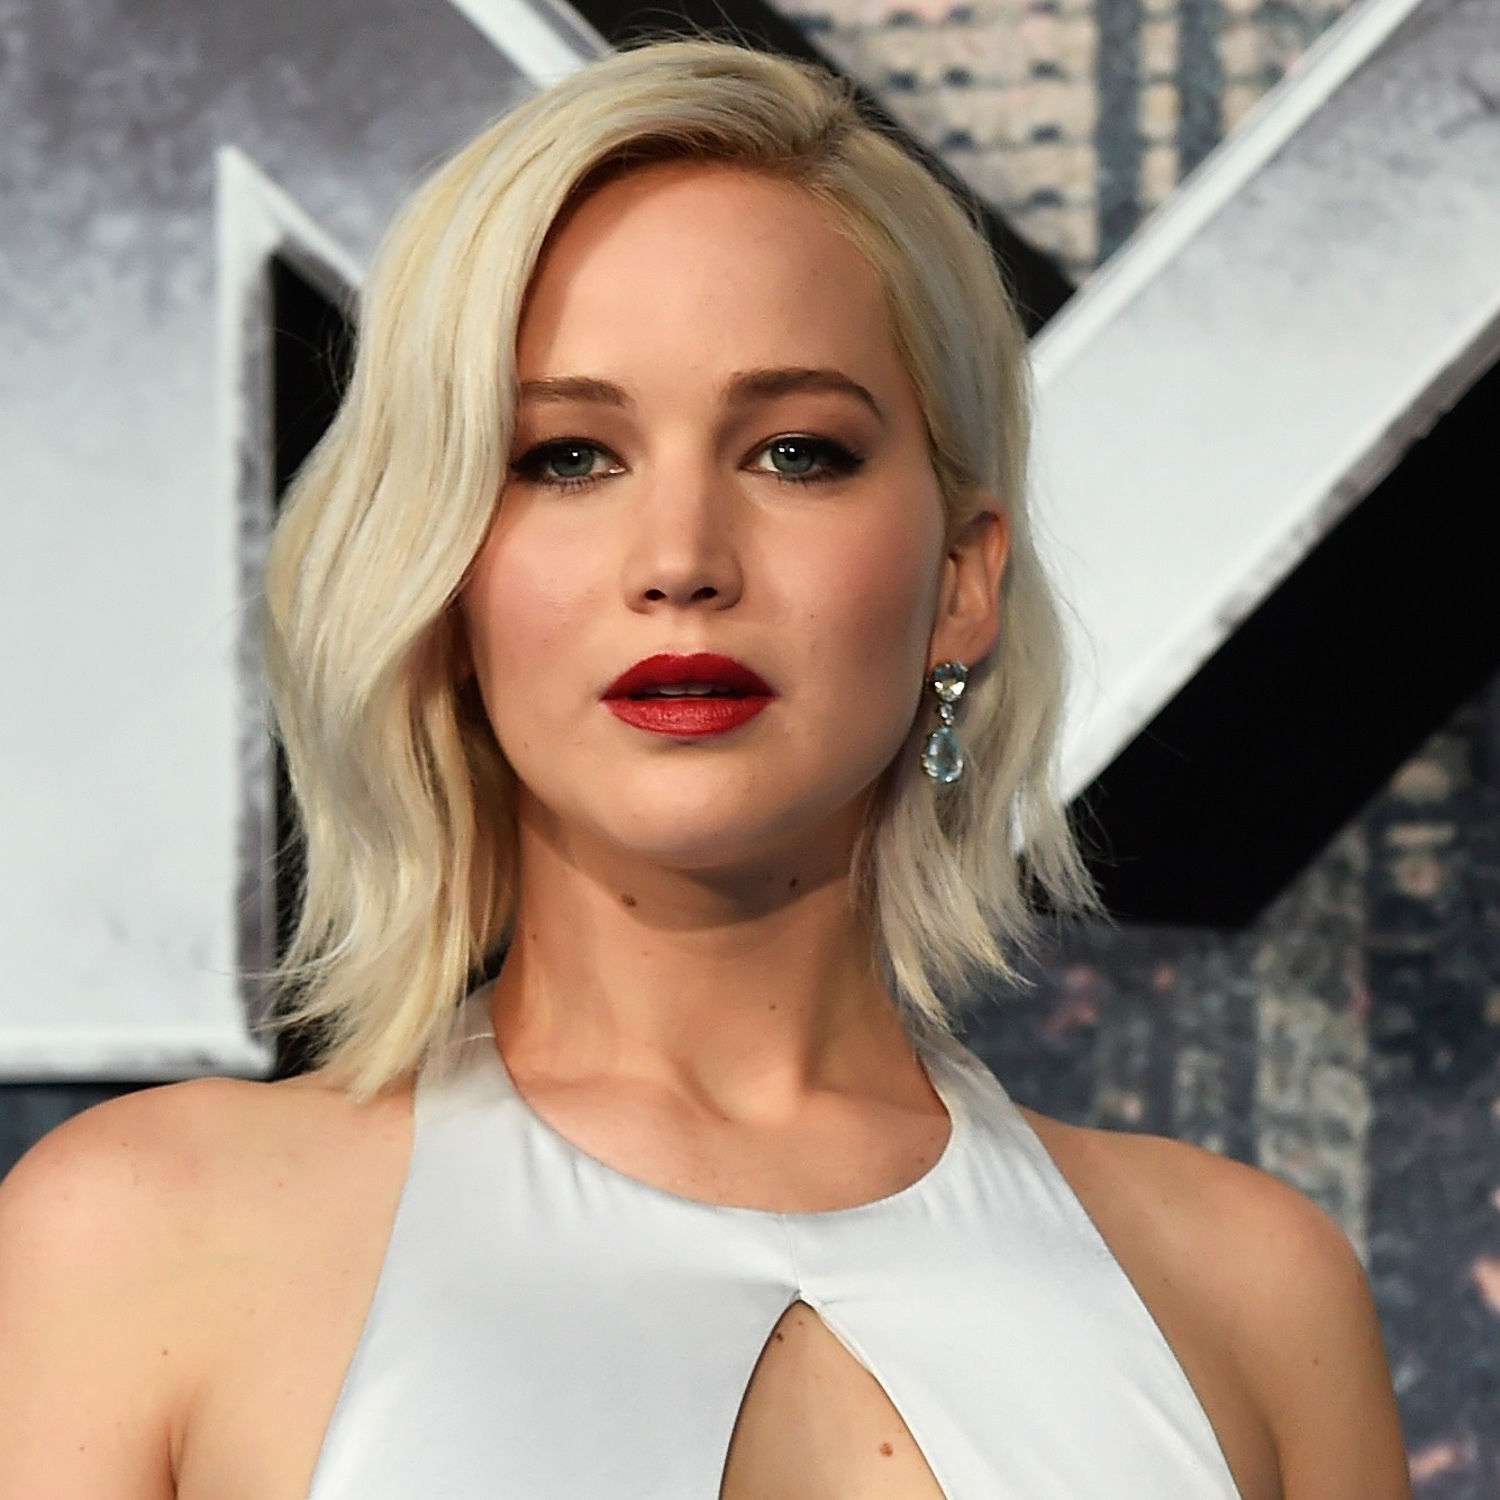

'Another Picture of a Person'

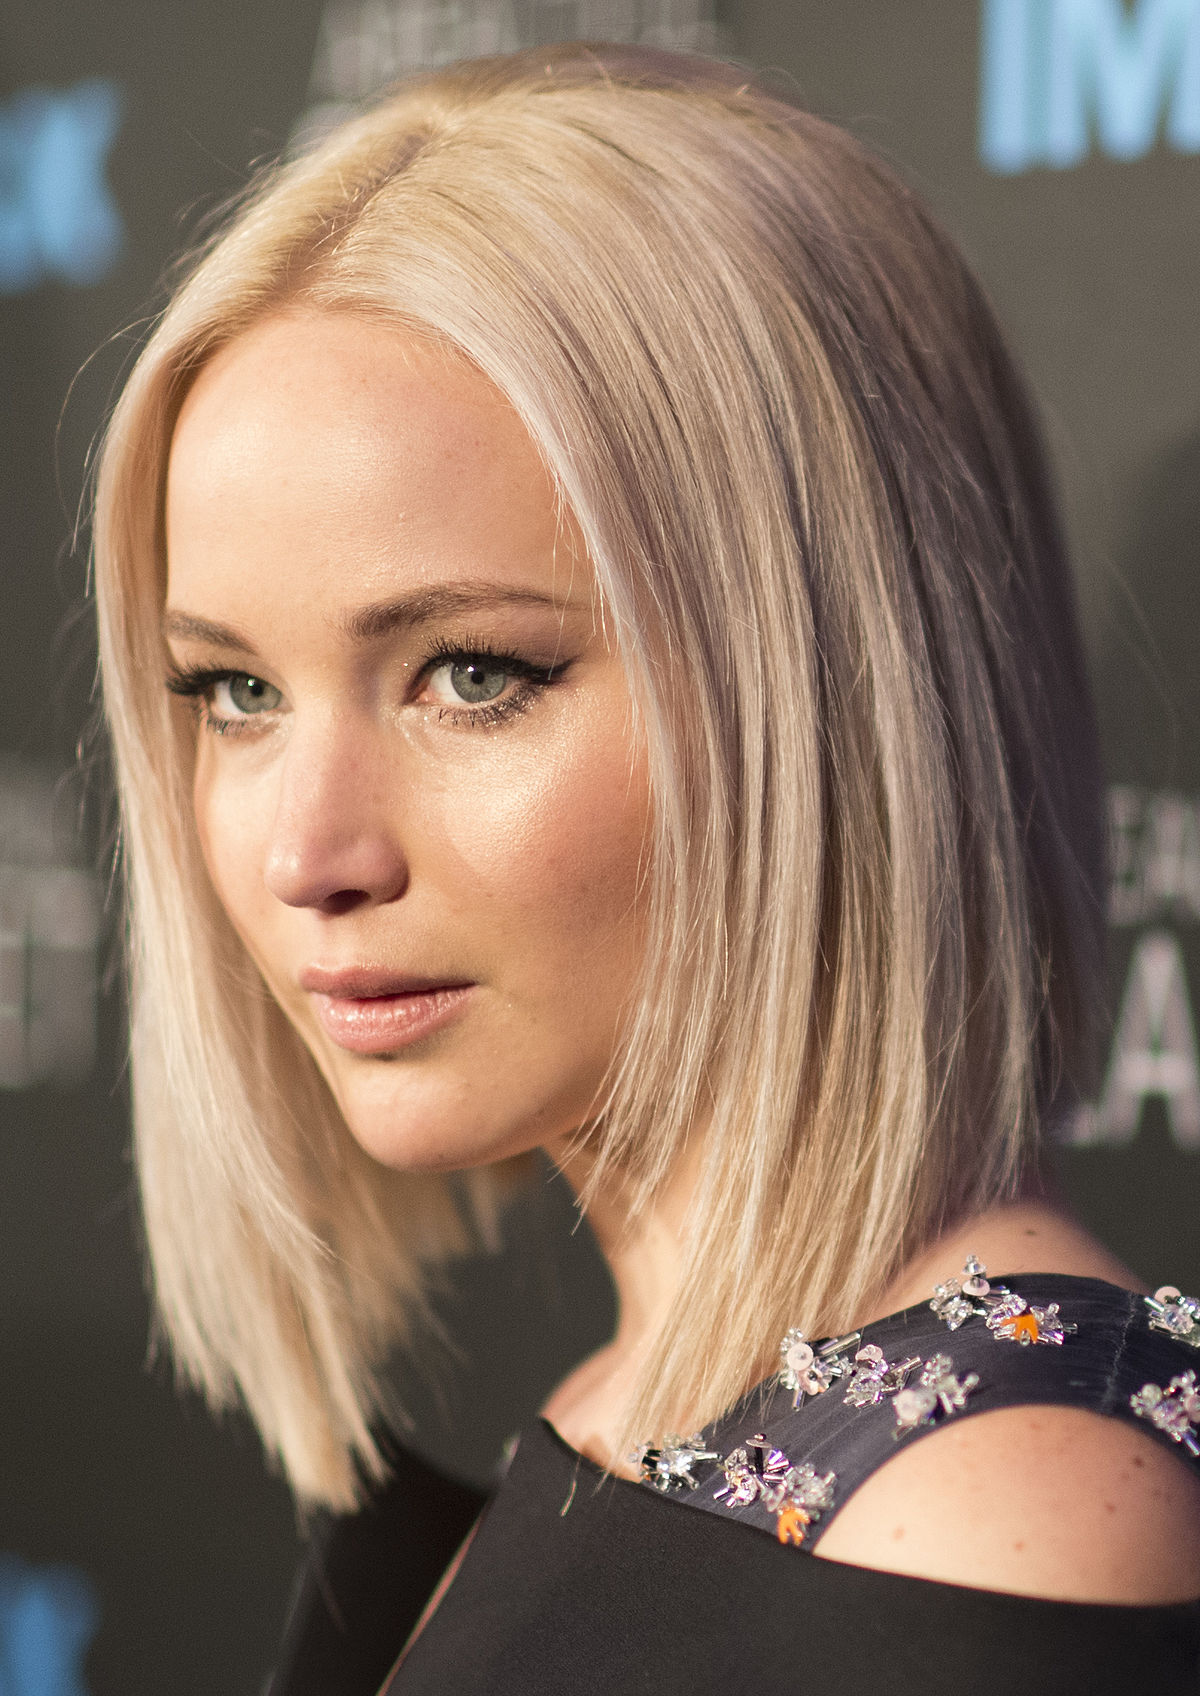

In [15]:
#Image jennifer-lawrence 6
Image3 = Image(filename='6. jennifer-lawrence.jpg', width=300, height=300)
#Image jennifer-lawrence 1
Image4 = Image(filename='1. 1200px-jennifer_lawrence_in_2016.jpg', width=300, height=300)
display('Picture encoded and Associated with Jennifer Lawrence', Image3,'Another Picture of a Person', Image4)

Nice regognition job. Although the face is tilted, JL was succesfully recognized. 

This script works well to detect faces. Using the YouTube Statistics we could roughly see how accurate the detection works for each individual frame. It takes a very long time however to go through all the batches of frames. This script processes 128 frames at the time- each set being one batch. Once it's done, it displays the location of faces in case it found one.

In [6]:
import face_recognition
import cv2
# This code finds all faces in a list of images using the CNN model.
#
# This demo is for the _special case_ when you need to find faces in LOTS of images very quickly and all the images
# are the exact same size. This is common in video processing applications where you have lots of video frames
# to process.
#
# If you are processing a lot of images and using a GPU with CUDA, batch processing can be ~3x faster then processing
# single images at a time. But if you aren't using a GPU, then batch processing isn't going to be very helpful.
#
# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read the video file.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Open video file
video_capture = cv2.VideoCapture("You Had Me at Hello - Jerry Maguire (78) Movie CLIP (1996) HD.mp4")

frames = []
frame_count = 0

while video_capture.isOpened():
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        break

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    frame = frame[:, :, ::-1]

    # Save each frame of the video to a list
    frame_count += 1
    frames.append(frame)

    # Every 128 frames (the default batch size), batch process the list of frames to find faces
    if len(frames) == 128:
        batch_of_face_locations = face_recognition.batch_face_locations(frames, number_of_times_to_upsample=0)

        # Now let's list all the faces we found in all 128 frames
        for frame_number_in_batch, face_locations in enumerate(batch_of_face_locations):
            number_of_faces_in_frame = len(face_locations)

            frame_number = frame_count - 128 + frame_number_in_batch
            print("I found {} face(s) in frame #{}.".format(number_of_faces_in_frame, frame_number))

            for face_location in face_locations:
                # Print the location of each face in this frame
                top, right, bottom, left = face_location
                print(" - A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

        # Clear the frames array to start the next batch
        frames = []

I found 1 face(s) in frame #0.
 - A face is located at pixel location Top: 40, Left: 282, Bottom: 154, Right: 396
I found 1 face(s) in frame #1.
 - A face is located at pixel location Top: 40, Left: 282, Bottom: 154, Right: 396
I found 1 face(s) in frame #2.
 - A face is located at pixel location Top: 40, Left: 282, Bottom: 154, Right: 396
I found 1 face(s) in frame #3.
 - A face is located at pixel location Top: 40, Left: 282, Bottom: 154, Right: 396
I found 1 face(s) in frame #4.
 - A face is located at pixel location Top: 40, Left: 282, Bottom: 154, Right: 396
I found 1 face(s) in frame #5.
 - A face is located at pixel location Top: 40, Left: 282, Bottom: 154, Right: 396
I found 1 face(s) in frame #6.
 - A face is located at pixel location Top: 40, Left: 282, Bottom: 154, Right: 396
I found 1 face(s) in frame #7.
 - A face is located at pixel location Top: 40, Left: 282, Bottom: 154, Right: 396
I found 1 face(s) in frame #8.
 - A face is located at pixel location Top: 40, Left: 282

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\E5430\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-1e4d7d41c3fb>", line 39, in <module>
    batch_of_face_locations = face_recognition.batch_face_locations(frames, number_of_times_to_upsample=0)
  File "c:\users\e5430\anaconda3\pkgs\face_recognition\face_recognition\api.py", line 146, in batch_face_locations
    raw_detections_batched = _raw_face_locations_batched(images, number_of_times_to_upsample, batch_size)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\E5430\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1821, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exceptio

KeyboardInterrupt: 

In [5]:
# This is a demo of running face recognition on a video file and saving the results to a new video file.
#
# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Open the input movie file
input_movie = cv2.VideoCapture("You Had Me at Hello - Jerry Maguire (78) Movie CLIP (1996) HD.mp4")
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

# Create an output movie file (make sure resolution/frame rate matches input video!)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter('output.avi', fourcc, 29.97, (640, 360))

# Load some sample pictures and learn how to recognize them.
lmm_image = face_recognition.load_image_file("Tom_Cruise_avp_2014_4.jpg")
#Deep Learning Library face_encoding called
lmm_face_encoding = face_recognition.face_encodings(lmm_image)[0]

al_image = face_recognition.load_image_file("Tom_Cruise_avp_2014_4.jpg")
al_face_encoding = face_recognition.face_encodings(al_image)[0]

known_faces = [
    lmm_face_encoding,
    al_face_encoding
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

while True:
    # Grab a single frame of video
    ret, frame = input_movie.read()
    frame_number += 1

    # Quit when the input video file ends
    if not ret:
        break

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)

        # If you had more than 2 faces, you could make this logic a lot prettier
        # but I kept it simple for the demo
        name = None
        if match[0]:
            name = "Lin-Manuel Miranda"
        elif match[1]:
            name = "Alex Lacamoire"

        face_names.append(name)

    # Label the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Write the resulting image to the output video file
    print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)

# All done!
input_movie.release()
cv2.destroyAllWindows()

Writing frame 1 / 3396
Writing frame 2 / 3396
Writing frame 3 / 3396
Writing frame 4 / 3396
Writing frame 5 / 3396
Writing frame 6 / 3396
Writing frame 7 / 3396
Writing frame 8 / 3396
Writing frame 9 / 3396
Writing frame 10 / 3396
Writing frame 11 / 3396
Writing frame 12 / 3396
Writing frame 13 / 3396
Writing frame 14 / 3396
Writing frame 15 / 3396
Writing frame 16 / 3396
Writing frame 17 / 3396
Writing frame 18 / 3396
Writing frame 19 / 3396
Writing frame 20 / 3396
Writing frame 21 / 3396
Writing frame 22 / 3396
Writing frame 23 / 3396
Writing frame 24 / 3396
Writing frame 25 / 3396
Writing frame 26 / 3396
Writing frame 27 / 3396
Writing frame 28 / 3396
Writing frame 29 / 3396
Writing frame 30 / 3396
Writing frame 31 / 3396
Writing frame 32 / 3396
Writing frame 33 / 3396
Writing frame 34 / 3396
Writing frame 35 / 3396
Writing frame 36 / 3396
Writing frame 37 / 3396
Writing frame 38 / 3396
Writing frame 39 / 3396
Writing frame 40 / 3396
Writing frame 41 / 3396
Writing frame 42 / 3396
W